In [101]:
import numpy
import pandas
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

In [102]:
dataset = pandas.read_csv('prepared_data.csv')
dataset.head(10)

,Unnamed: 0,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,1,2,3,4,5,6,7,8
0,0,0.209515,0.163322,0.305476,0.05,0.678571,0.516995,1,1,1,0,0,1,0,0,0,0,0
1,1,0.176091,0.000000,0.000000,0.05,0.750000,0.516995,1,0,1,0,0,0,0,0,1,0,0
2,2,0.408240,0.288130,0.347262,0.05,0.821429,0.229966,1,1,1,0,0,1,0,0,0,0,0
3,3,0.278754,0.195649,0.238705,0.05,0.750000,0.516995,1,0,1,1,0,0,0,0,0,0,0
4,4,0.819544,0.592565,0.652738,0.30,0.535714,0.516995,0,1,1,0,0,1,0,0,0,0,0
5,5,0.437751,0.346509,0.496588,0.20,0.571429,0.516995,1,1,1,0,0,0,0,0,0,0,1
6,6,0.292256,0.174189,0.283792,0.05,0.321429,0.679257,0,0,1,0,0,0,0,0,0,0,1
7,7,0.245513,0.130147,0.215239,0.05,0.428571,0.388298,1,1,0,0,0,0,1,0,0,0,0
8,8,0.653213,0.384155,0.593649,0.20,0.428571,0.388298,1,1,1,0,0,1,0,0,0,0,0
9,9,0.447158,0.438901,0.513548,0.25,0.692857,0.679257,1,0,1,0,0,0,0,1,0,0,0


In [103]:
X = dataset.iloc[: , 2:].values
Y = dataset['price'].values

In [104]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.3)

In [105]:
input_layer_size = 16

first_hidden_layer_size = 90 
second_hidden_layer_size = 27
third_hidden_layer_size = 18 

output_layer_size = 1 

epochs_number = 80
batch_size = 32

In [106]:
model = Sequential()

# Входной слой и первый скрытый слой, функция активации - ReLU
model.add(Dense(first_hidden_layer_size, input_dim=input_layer_size, activation='relu'))

# Второй скрытый слой, функция активации - ReLU
model.add(Dense(second_hidden_layer_size, activation='relu'))

model.add(Dense(third_hidden_layer_size, activation='relu'))

# Выходной слой, функция активации - линейная, т.к. решается задача регрессии.
model.add(Dense(output_layer_size, activation='linear'))

In [107]:
# Обзор нейронной сети, теперь в ней есть слои и нейроны.
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 90)                1530      
_________________________________________________________________
dense_18 (Dense)             (None, 27)                2457      
_________________________________________________________________
dense_19 (Dense)             (None, 18)                504       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 19        
Total params: 4,510
Trainable params: 4,510
Non-trainable params: 0
_________________________________________________________________


In [108]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])

In [109]:
history = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=epochs_number, batch_size=batch_size)

Train on 1428 samples, validate on 612 samples
Epoch 1/80
1428/1428 [==============================] - 0s 317us/step - loss: 0.0347 - mean_absolute_error: 0.1376 - mean_squared_error: 0.0347 - val_loss: 0.0129 - val_mean_absolute_error: 0.0881 - val_mean_squared_error: 0.0129
Epoch 2/80
1428/1428 [==============================] - 0s 170us/step - loss: 0.0097 - mean_absolute_error: 0.0747 - mean_squared_error: 0.0097 - val_loss: 0.0064 - val_mean_absolute_error: 0.0626 - val_mean_squared_error: 0.0064
Epoch 3/80
1428/1428 [==============================] - 0s 178us/step - loss: 0.0056 - mean_absolute_error: 0.0561 - mean_squared_error: 0.0056 - val_loss: 0.0043 - val_mean_absolute_error: 0.0501 - val_mean_squared_error: 0.0043
Epoch 4/80
1428/1428 [==============================] - 0s 163us/step - loss: 0.0048 - mean_absolute_error: 0.0512 - mean_squared_error: 0.0048 - val_loss: 0.0052 - val_mean_absolute_error: 0.0575 - val_mean_squared_error: 0.0052
Epoch 5/80
1428/1428 [===========

Epoch 36/80
1428/1428 [==============================] - 0s 91us/step - loss: 0.0033 - mean_absolute_error: 0.0416 - mean_squared_error: 0.0033 - val_loss: 0.0032 - val_mean_absolute_error: 0.0415 - val_mean_squared_error: 0.0032
Epoch 37/80
1428/1428 [==============================] - 0s 134us/step - loss: 0.0033 - mean_absolute_error: 0.0412 - mean_squared_error: 0.0033 - val_loss: 0.0034 - val_mean_absolute_error: 0.0432 - val_mean_squared_error: 0.0034
Epoch 38/80
1428/1428 [==============================] - 0s 125us/step - loss: 0.0033 - mean_absolute_error: 0.0415 - mean_squared_error: 0.0033 - val_loss: 0.0033 - val_mean_absolute_error: 0.0426 - val_mean_squared_error: 0.0033
Epoch 39/80
1428/1428 [==============================] - 0s 131us/step - loss: 0.0033 - mean_absolute_error: 0.0412 - mean_squared_error: 0.0033 - val_loss: 0.0035 - val_mean_absolute_error: 0.0445 - val_mean_squared_error: 0.0035
Epoch 40/80
1428/1428 [==============================] - 0s 97us/step - loss:

1428/1428 [==============================] - 0s 137us/step - loss: 0.0030 - mean_absolute_error: 0.0399 - mean_squared_error: 0.0030 - val_loss: 0.0034 - val_mean_absolute_error: 0.0435 - val_mean_squared_error: 0.0034
Epoch 72/80
1428/1428 [==============================] - 0s 133us/step - loss: 0.0028 - mean_absolute_error: 0.0389 - mean_squared_error: 0.0028 - val_loss: 0.0043 - val_mean_absolute_error: 0.0501 - val_mean_squared_error: 0.0043
Epoch 73/80
1428/1428 [==============================] - 0s 119us/step - loss: 0.0029 - mean_absolute_error: 0.0401 - mean_squared_error: 0.0029 - val_loss: 0.0032 - val_mean_absolute_error: 0.0406 - val_mean_squared_error: 0.0032
Epoch 74/80
1428/1428 [==============================] - 0s 105us/step - loss: 0.0028 - mean_absolute_error: 0.0385 - mean_squared_error: 0.0028 - val_loss: 0.0036 - val_mean_absolute_error: 0.0446 - val_mean_squared_error: 0.0036
Epoch 75/80
1428/1428 [==============================] - 0s 124us/step - loss: 0.0030 - 

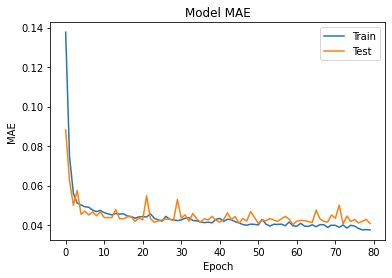

In [110]:
# Выводим динамику среднего абсолютного отклонения от номера эпохи обучения.
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error']) 
plt.title('Model MAE') 
plt.ylabel('MAE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

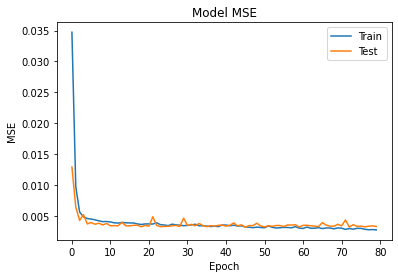

In [111]:
# Выводим динамику среднеквадратического отклонения, т.е. значения функции потерь, от номера эпохи обучения.
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error']) 
plt.title('Model MSE') 
plt.ylabel('MSE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

In [112]:
# Предсказание уже обученной нейронной сети на обучающей выборке:
Y_pred_train = model.predict(X_train).flatten()

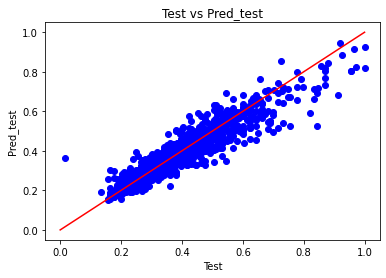

In [113]:
# Сравним эталонные значения Y_train и результат работы обученной нейронной сети Y_pred_train для обучающей выборки.
plt.plot(Y_train, Y_pred_train, 'bo')
plt.plot([0,1], [0,1], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

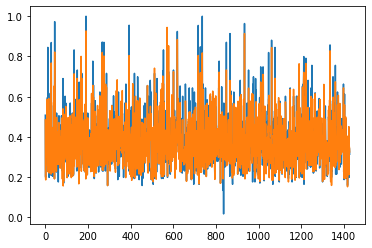

In [114]:
# Выведем сами значения Y_train и Y_pred_train.
plt.plot(Y_train)
plt.plot(Y_pred_train)
plt.show()

In [115]:
# Предсказание обученной нейронной сети на тестовой выборке:
Y_pred_test = model.predict(X_test).flatten()

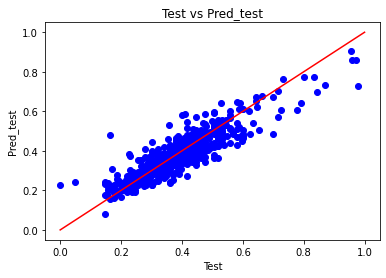

In [116]:
# Сравним эталонные значения Y_test и результат работы обученной нейронной сети Y_pred_test для тестовой выборки.
plt.plot(Y_test, Y_pred_test, 'bo')
plt.plot([0,1], [0,1], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

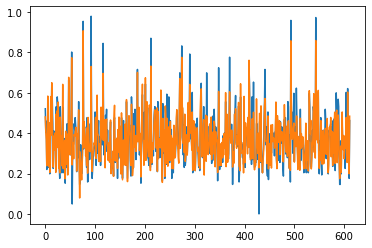

In [117]:
# Выведем сами значения Y_test и Y_pred_test.
plt.plot(Y_test)
plt.plot(Y_pred_test)
plt.show()

In [118]:
# Сравним среднеквадратичные ошибки (значения функции потерь) для обучающей и тестовой выборок.
print(numpy.sqrt(mean_squared_error(Y_train, Y_pred_train)))
print(numpy.sqrt(mean_squared_error(Y_test, Y_pred_test)))

0.05041622423741392
0.05724290687011074


In [119]:
# Проверим на нормальное распределение разности пар (Y_train, Y_pred_train), (Y_test, Y_pred_test)
k_train, p_train = stats.shapiro(Y_train - Y_pred_train)
print('Train k = {0}, p = {1}'.format(k_train, p_train))

k_test, p_test = stats.shapiro(Y_test - Y_pred_test)
print('Test k = {0}, p = {1}'.format(k_test, p_test))

Train k = 0.9476756453514099, p = 4.079887627607205e-22
Test k = 0.9577982425689697, p = 3.0446626123059595e-12


In [120]:
# Для полной выборки (Y, Y_pred) применим два статистических теста: shapiro и normaltest.
Y_pred = model.predict(X).flatten()

k_s, p_s = stats.shapiro(Y - Y_pred)
print('k_s = {0}, p_s = {1}'.format(k_s, p_s))

k_n, p_n = stats.normaltest(Y - Y_pred)
print('k_n = {0}, p_n = {1}'.format(k_n, p_n))

k_s = 0.9520708918571472, p_s = 2.554531784560336e-25
k_n = 217.31730974782866, p_n = 6.458709885994773e-48


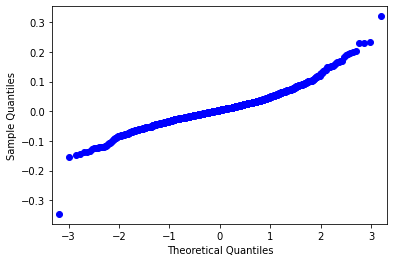

In [121]:
# Обучающая выборка
qqplot(Y_train - Y_pred_train)
plt.show()

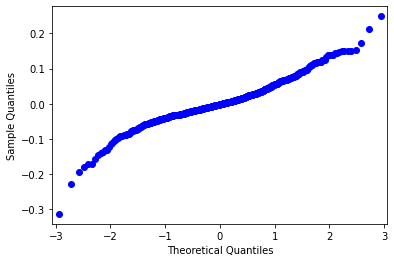

In [122]:
# Тестовая выборка
qqplot(Y_test - Y_pred_test)
plt.show()

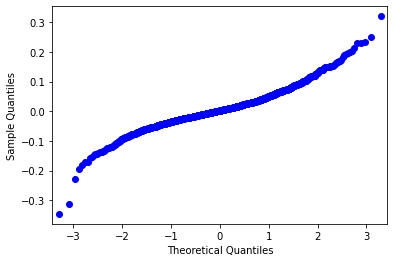

In [123]:
# Полная выборка
qqplot(Y - Y_pred)
plt.show()

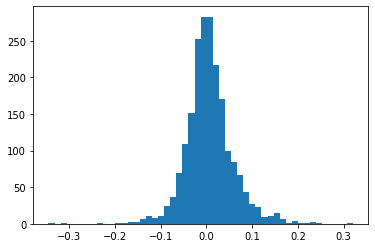

In [124]:
# Можо также визульно убедиться, что распределения "почти нормальное".
plt.hist(Y - Y_pred, bins=50)
plt.show()

In [125]:
model.save('SimpleNeuralNetworkNumber3.h5')